# Basic demonstration of Pandas and Matplotlib using heat flow calorimetry data

This notebook demonstrates data import and processing of isothermal heat flow calorimetry data of C3S pastes containing two different additives. The experiments in the dataset are described in the following table.

| Experiment Code | Water Amount g | C3S Amount g | Additive Name | Additive Dosage mmol/L |
|-----------------|----------------|--------------|---------------|------------------------|
| JAA_CAL714      | 1.6            | 4            | Sucrose       | 0.25                   |
| JAA_CAL715      | 1.6            | 4            | Sucrose       | 0.5                    |
| JAA_CAL716      | 1.6            | 4            | Sucrose       | 0.75                   |
| JAA_CAL717      | 1.6            | 4            | Sucrose       | 1                      |
| JAA_CAL718      | 1.6            | 4            | Glucose       | 0.25                   |
| JAA_CAL719      | 1.6            | 4            | Glucose       | 0.5                    |
| JAA_CAL720      | 1.6            | 4            | Glucose       | 0.75                   |
| JAA_CAL721      | 1.6            | 4            | Glucose       | 1                      |
| JAA_CAL722      | 2              | 4            | Reference     | 0                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tgaedt/workshop_uv/blob/main/notebooks/0_start.ipynb)



In [19]:
%%bash

git clone --depth 1 --filter=blob:none --sparse https://github.com/tgaedt/workshop_uv.git

cd workshop_uv
git sparse-checkout set data

fatal: destination path 'workshop_uv' already exists and is not an empty directory.


# Data Exploration and Visualization of Calorimetry Data

The code above creates a folder inside the colab runtime with the calorimetry data. This is ephemeral data, i.e., it is lost when the colab runtime is shutdown (which happens automatically).

Next, we will show how the data can be loaded and plotted using conventional tools such as `pandas` and `matplotlib`. Therefore, we have to import the respective libraries. If this is run in google colab, no `pip install` is necessary as these popular libraries come pre-installed in a google colab runtime. 

## Defining folders
We use the popular library `pathlib` to define the folder containing the `.csv` files with the calorimetry data.



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

folder = pathlib.Path("workshop_uv/data/calo")

df = pd.concat(
    [pd.read_csv(f) for f in folder.glob("*.csv")],
)

df

,time_s,temperature_c,heat_flow_w,heat_j,normalized_heat_flow_w_g,normalized_heat_j_g,sample,sample_short,temperature_ambientt_therm3t_c,temperature_temperature_c,comments_nan
0,3611.037066,20.0,0.000114,76.869919,0.000028,19.217480,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
1,4129.695025,20.0,0.000104,76.926600,0.000026,19.231650,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
2,4630.023150,20.0,0.000098,76.977372,0.000025,19.244343,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
3,5219.939654,20.0,0.000093,77.033889,0.000023,19.258472,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
4,5857.452837,20.0,0.000089,77.091527,0.000022,19.272882,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
744,255466.434987,20.0,0.000981,839.262916,0.000245,209.815729,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
745,256921.597462,20.0,0.000977,840.688188,0.000244,210.172047,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
746,258151.694630,20.0,0.000973,841.888038,0.000243,210.472010,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN
747,259206.729370,20.0,0.000971,842.913413,0.000243,210.728353,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,NaN


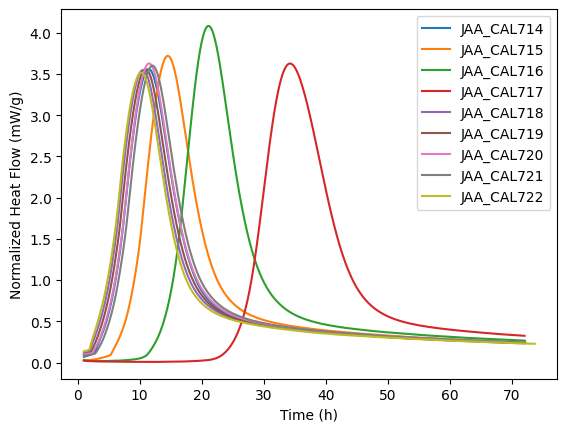

In [21]:
fig, ax = plt.subplots()
for smp, smp_df in df.groupby("sample_short"):
    ax.plot(smp_df.time_s/3600, smp_df.normalized_heat_flow_w_g*1000, label=smp)

ax.set_xlabel("Time (h)")
ax.set_ylabel("Normalized Heat Flow (mW/g)")
plt.legend()
plt.show()

In [22]:
metadf = pd.read_csv("workshop_uv/data/metadata_calo/metadata.csv")

dfm = pd.merge(df, metadf, left_on="sample_short", right_on="sample")
dfm

,time_s,temperature_c,heat_flow_w,heat_j,normalized_heat_flow_w_g,normalized_heat_j_g,sample_x,sample_short,temperature_ambientt_therm3t_c,temperature_temperature_c,...,art_nr,cas_nr,product_g,comment_lj,stem_solution,single_solution_mL,stem_solution_V,sample_y,additive_name_fixed,cement_short
0,3611.037066,20.0,0.000114,76.869919,0.000028,19.217480,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL716,Sucrose,C3S
1,4129.695025,20.0,0.000104,76.926600,0.000026,19.231650,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL716,Sucrose,C3S
2,4630.023150,20.0,0.000098,76.977372,0.000025,19.244343,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL716,Sucrose,C3S
3,5219.939654,20.0,0.000093,77.033889,0.000023,19.258472,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL716,Sucrose,C3S
4,5857.452837,20.0,0.000089,77.091527,0.000022,19.272882,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL716,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL716,Sucrose,C3S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,255466.434987,20.0,0.000981,839.262916,0.000245,209.815729,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL721,Glucose,C3S
6658,256921.597462,20.0,0.000977,840.688188,0.000244,210.172047,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL721,Glucose,C3S
6659,258151.694630,20.0,0.000973,841.888038,0.000243,210.472010,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL721,Glucose,C3S
6660,259206.729370,20.0,0.000971,842.913413,0.000243,210.728353,/home/torben/LRZ Sync+Share/0_TUM/10_Coding/0_...,JAA_CAL721,NaN,NaN,...,NaN,NaN,250.0,NaN,0.01,NaN,NaN,JAA_CAL721,Glucose,C3S


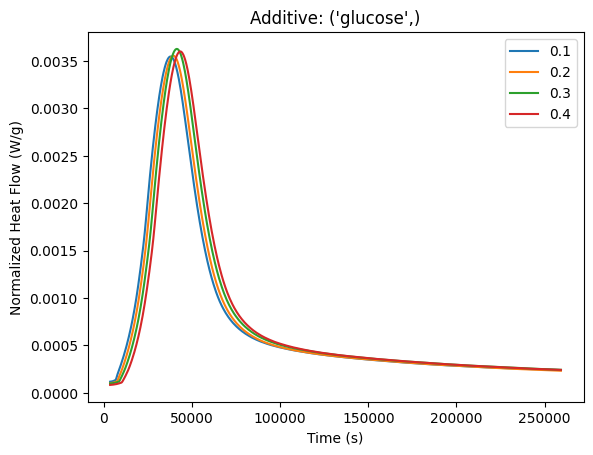

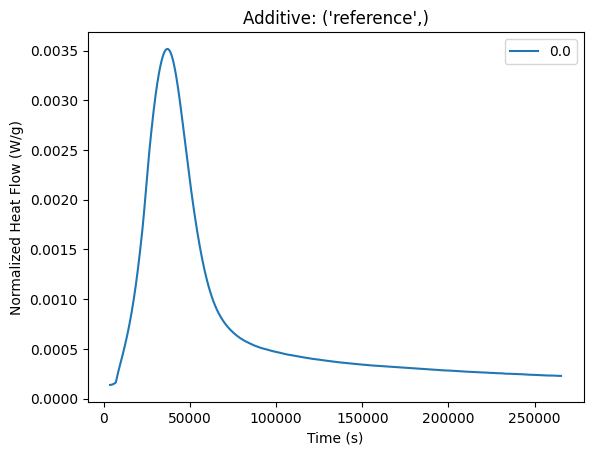

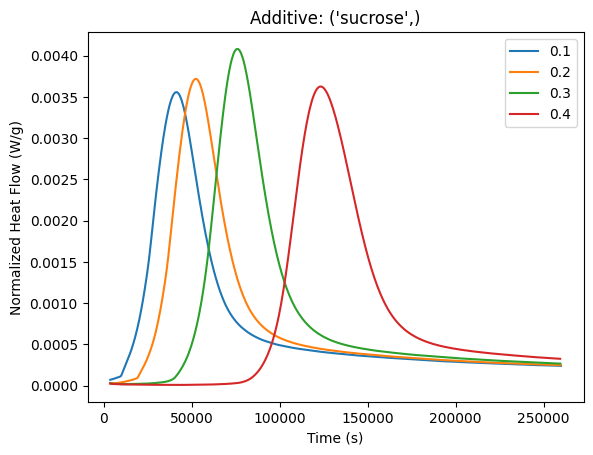

In [23]:
for additive, additive_data in dfm.groupby(["additive_name"]):
    fig, ax = plt.subplots()
    for dosage, dosage_data in additive_data.groupby("dosage_additive_micromol_g_cem"):
        ax.plot(dosage_data["time_s"], dosage_data["normalized_heat_flow_w_g"], label=dosage)
    ax.set_title(f"Additive: {additive}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Normalized Heat Flow (W/g)")
    ax.legend()
    plt.show()

In [25]:
# the need to include or inject the reference into additive data

def create_reference_data(dfm, sample_code, retarders):
    data = dfm.copy()
    data.loc[data["additive_name"] == sample_code, "additive_name"] = data.loc[
        data["additive_name"] == sample_code, "additive_name"
    ].apply(lambda x: retarders)
    data = data.explode("additive_name")
    return data

retarders = ["sucrose", "glucose"]
df_ref = create_reference_data(dfm, "reference", retarders)
df_ref = df_ref.explode("additive_name")

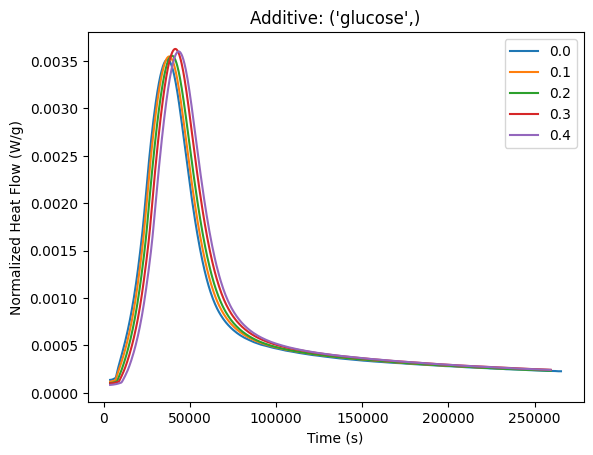

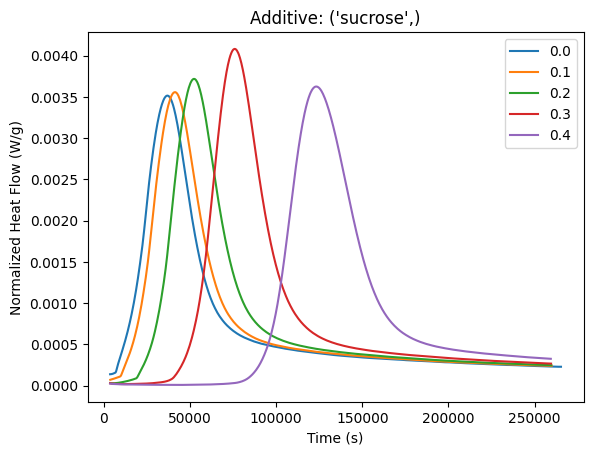

In [26]:
# Plotting

for additive, additive_data in df_ref.groupby(["additive_name"]):
    fig, ax = plt.subplots()
    for dosage, dosage_data in additive_data.groupby("dosage_additive_micromol_g_cem"):
        ax.plot(dosage_data["time_s"], dosage_data["normalized_heat_flow_w_g"], label=dosage)
    ax.set_title(f"Additive: {additive}")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Normalized Heat Flow (W/g)")
    ax.legend()
    plt.show()